## Componentes Principales:  
### Raul Marusca  
#### 

<div class="alert alert-block alert-danger">
    <p><b>¡Atencion!</b></p> Informacion importante
</div>

## Problemas con el dataset

Tal como podemos leer en el area de discusiones del data set en __[Kaggle](https://www.kaggle.com/adityakadiwal/water-potability/discussion)__  muchos usuarios detectaron ciertas inconsistencias entre lo necesario para que el agua sea considerada potable y el etiquetado de este dataset  
Por ejemplo, se reportan valores fuera de los parametros considerados potables pero el dataset los indica como en condiciones para consumo humano. Y viceversa  
Asi que demos partir de la base de que estos datos no son confiables y no esperar un resultado logico en la busqueda de patrones o en la precision del modelo  
Ademas los datos no estan completos, faltan algunos valores. En este estudio consideraremos que todo registro que no esta completo debe ser descartado y solo trabajaremos con registros con datos en todas sus variables  
Procederemos igual con el analisis por Componentes Principales

#### Carga de librerias y configuracion inicial 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from collections import Counter
from scipy import stats
from sklearn.decomposition import PCA

plt.rcParams["figure.figsize"] = (10, 10)
plt.style.use('fivethirtyeight')
plt.style.use('tableau-colorblind10')

#### Carga de datos y separacion de features y target

In [3]:
# Leemos el csv local
# la primera fila son los nombres de los campos. Con skip_header no cargamos esa fila
datos_iniciales = np.genfromtxt(
    './water_potability.csv', delimiter=',',skip_header=1)

# Como hay valores nulos los vamos a eliminar
# np.isnan devuelve todos los valores nulos
# de esos valores nulos con any(axis=1) obtengo todas las filas que 
# tienen al menos un valor nulo
# con el ~ lo niego y obtengo todas las filas que NO tienen valores nulos
# aplico esa seleccion y obtengo los datos que quiero
datos = datos_iniciales[~np.isnan(datos_iniciales).any(axis=1), :]

# leemos del csv solo la primer fila y obtenemos el nombre de la scolumnas
nombres = np.loadtxt('./water_potability.csv',
                     delimiter=",", max_rows=1, dtype=str)

print("El dataset tiene {} filas por {} columnas de datos utiles".format(datos.shape[0], datos.shape[1]))

#print(datos.shape)
#print(datos[0:5,:])
# print(nombres)

# Extraemos las "features" o sea las variables de entrada
# Nos quedamos con todas las filas (:) y con todas las columnas 
# excepto la ultima (:-1)
X = datos[:,0:-1]
#print(X.shape)
#print(X[:,:])

# Ahora extaremos el "target" en la ultima columna del dataset
y = datos[:,-1]
#print(y.shape)
#print(y[0:9])

print(datos.shape)

El dataset tiene 2011 filas por 10 columnas de datos utiles
(2011, 10)


#### Normalizamos el dataset

In [28]:
# Escalo los datos: en general es buena idea para que el algoritmo funcione mejor
# creamos un objeto que tiene los metodos necesarios para escalar o normalizar
scaler = StandardScaler()

# Hago que ese objeto se ajuste a los datos que tenemos en las "features"
# (o sea, calcula media y desviacion de cada columna)
scaler.fit(X)

# aplico el ajuste a las "features" y las recreo normalizadas
X=scaler.transform(X)

#### Creamos el modelo

In [29]:
# Creamos el objeto que aloja los metodos para transformar a Componentes Principales
# hacemos que tome las 9 columnas para generar 9 componentes
# Esto es por defecto pero sirve para experimentar
pca = PCA(n_components=9)

# Ajustamos ese modelo a nuestras features y target
pca.fit(X,y)

# Aplicamos ese modelo ajustado a nuestras features y obtenemos la prediccion del target 
x_new = pca.transform(X)

In [30]:
# Varianza explicada por cada componente
var_pc = pca.explained_variance_ratio_
#print(var_pc)

indice = 1
for var in var_pc:
    print("PCA{} : {}".format(indice, round(var,4)))
    indice += 1

PCA1 : 0.1341
PCA2 : 0.1301
PCA3 : 0.1162
PCA4 : 0.1123
PCA5 : 0.1117
PCA6 : 0.1078
PCA7 : 0.1057
PCA8 : 0.0971
PCA9 : 0.0851


(Podemos ver que con 7 componentes ya tendriamos cubierto el 99% del modelo)

#### Graficamos  
Elegimos los dos primeros componentes principales y los asociamos a los ejes x e y de un diagrama de dispersion

NameError: name 'disp' is not defined

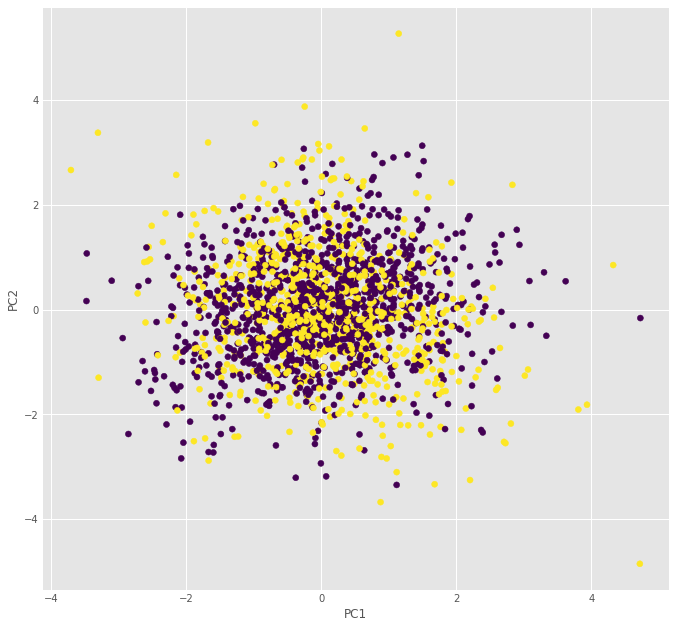

In [31]:
# le damos un estilo a nuestro grafico
plt.style.use('ggplot')

# asignamos los dos primeros PC a los ejes coordinados
x_valor = x_new[:,0]
y_valor = x_new[:,1]

# hacemos un grafico de dispersion
dispersion_1 = plt.scatter(x_valor, y_valor , c=y)

# Le ponemos nombre a los ejes
plt.xlabel("PC1");
plt.ylabel("PC2");

# mostramos la leyend
plt.legend(handles=dispersion_1.legend_elements()[0], labels=disp.legend_elements()[1], fontsize=16)

# Mostamos la grilla
plt.grid();

# imprimimos el grafico completo
plt.show();

#### Relacion entre features y componentes principales  
El metodo __.components___ del objeto **PCA** devuelve una matriz formada por los vectores
 que representan a las direcciones de los Componentes Principales  
Esas son las direcciones de maxima varianza  
En x_new quedaron las coordenadas de los puntos de las features en funcion de esas lineas  
Esto es un cambio de coordenadas  
Vamos a hacer un grafico donde proyectamos esos vectores directores sobre el plano formado por la dos primeras componentes

In [ ]:
# Definimos el rango de los ejes del grafico
plt.axis([-0.75,0.90,-0.75,0.5])

# Vemos cuantos vectores son las direcciones de maxima varianza
n = pca.components_.shape[0]

# Recorremos esos vectores y los vamos dibujando en el plano
for i in range(n):
    plt.arrow(0, 0, pca.components_[i,0], pca.components_[i,1], color = 'r', alpha = 1);
    # En el extremo de cada vector ponemos en nombre de la columan correspondiente (un poco dezplazados)
    plt.text(pca.components_[i,0]*1.1 , pca.components_[i,1]*1.1, nombres[i], color = 'g', ha = 'center', va = 'center', fontsize=12);

# Le ponemos nombre a los ejes
plt.xlabel("PC1");
plt.ylabel("PC2");

# imprimimos el grafico completo
plt.show();

#### Reduccion en el numero de componentes
Como vimos, con solo 7 componentes podemos determinar aproximadamente el 99% de los casos, asi que repetiremos el analisis solo empleando ese numero de columnas del dataset

In [ ]:
# Creamos el objeto que aloja los metodos para transformar a Componentes Principales
# En esta ocasion usamos solo 7 componentes
pca = PCA(n_components=7)

# Ajustamos ese modelo a nuestras features y target
pca.fit(X,y)

# Aplicamos ese modelo ajustado a nuestras features y obtenemos la prediccion del target 
x_new = pca.transform(X)

# Varianza explicada por cada componente
var_pc = pca.explained_variance_ratio_
#print(var_pc)

indice = 1
for var in var_pc:
    print("PCA{} : {}".format(indice, round(var,4)))
    indice += 1
    
# le damos un estilo a nuestro grafico
plt.style.use('ggplot')

# asignamos los dos primeros PC a los ejes coordinados
x_valor = x_new[:,0]
y_valor = x_new[:,1]

# hacemos un grafico de dispersion
dispersion_1 = plt.scatter(x_valor, y_valor , c=y)

# Le ponemos nombre a los ejes
plt.xlabel("PC1");
plt.ylabel("PC2");

# mostramos la leyend
plt.legend(handles=dispersion_1.legend_elements()[0], labels=dispersion_1.legend_elements()[1], fontsize=16)

# Mostamos la grilla
plt.grid();

# imprimimos el grafico completo
plt.show();

# Definimos el rango de los ejes del grafico
plt.axis([-0.75,0.90,-0.75,0.5])

# Vemos cuantos vectores son las direcciones de maxima varianza
n = pca.components_.shape[0]

# Recorremos esos vectores y los vamos dibujando en el plano
for i in range(n):
    plt.arrow(0, 0, pca.components_[i,0], pca.components_[i,1], color = 'r', alpha = 1);
    # En el extremo de cada vector ponemos en nombre de la columan correspondiente (un poco dezplazados)
    plt.text(pca.components_[i,0]*1.1 , pca.components_[i,1]*1.1, nombres[i], color = 'g', ha = 'center', va = 'center', fontsize=12);

# Le ponemos nombre a los ejes
plt.xlabel("PC1");
plt.ylabel("PC2");

# imprimimos el grafico completo
plt.show();


#### Conclusion  
Como podemos ver aunque solo nos quedemos con las columnas mas relevantes el analisis por componentes principales no nos permite obtener un borde de separacion claro.  
Esto seguramente debe estar muy relacionado a la "suciedad" de los datos.  
Para obtener mejores conclusiones, deberiamos obtener un mejor dataset.  
Lamentablemente esto no nos permite apreciar la ventaja visual que ofrece la reduccion de dimensiones del metodo de Componentes Principales.
